**Tutorial del Proyecto Naive Bayes**

- Comprender un dataset nuevo.
- Procesarlo aplicando un análisis exploratorio (EDA).
- Modelar los datos utilizando un Naive Bayes.
- Analizar los resultados y optimizar el modelo.

🌱 **Cómo iniciar este proyecto**
Sigue las siguientes instrucciones:

Crea un nuevo repositorio basado en el proyecto de Machine Learning haciendo clic aquí.
Abre el repositorio creado recientemente en Codespace usando la extensión del botón de Codespace.
Una vez que el VSCode del Codespace haya terminado de abrirse, comienza tu proyecto siguiendo las instrucciones a continuación.
🚛 Cómo entregar este proyecto
Una vez que hayas terminado de resolver el caso práctico, asegúrate de confirmar tus cambios, haz push a tu repositorio y ve a 4Geeks.com para subir el enlace del repositorio.

**📝 Instrucciones**
Análisis de sentimientos
Los modelos Naive Bayes son muy útiles cuando queremos analizar sentimientos, clasificar textos en tópicos o recomendaciones, ya que las características de estos desafíos cumplen muy bien con los supuestos teóricos y metodológicos del modelo.

En este proyecto practicarás con un conjunto de datos para crear un clasificador de reseñas de la tienda de Google Play.

1. Paso 1: Carga del conjunto de datos
El conjunto de datos se puede encontrar en esta carpeta de proyecto bajo el nombre playstore_reviews.csv. Puedes cargarlo en el código directamente desde el sigiente enlace:

https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv
O descargarlo y añadirlo a mano en tu repositorio. En este conjunto de datos encontrarás las siguientes variables:

package_name. Nombre de la aplicación móvil (categórico)
review. Comentario sobre la aplicación móvil (categórico)
polarity. Variable de clase (0 o 1), siendo 0 un comentario negativo y 1, positivo (categórico numérico)

2. Paso 2: Estudio de variables y su contenido
En este caso, tenemos solo 3 variables: 2 predictoras y una etiqueta dicotómica. De las dos predictoras, realmente solo nos interesa la parte del comentario, ya que el hecho de clasificar un comentario en positivo o negativo dependerá de su contenido, no de la aplicación de la que se haya escrito. Por lo tanto, la variable package_name habría que eliminarla.

Cuando trabajamos con textos como en este caso, no tiene sentido hacer un EDA, el proceso es diferente, ya que la única variable que nos interesa es la que contiene el texto. En otros casos en los que el texto formase parte de un conjunto complejo con otras variables predictoras numéricas y el objetivo de predicción sea distinto, entonces tiene sentido aplicar un EDA.

Sin embargo, no podemos trabajar con texto plano, antes hay que procesarlo. Este proceso consta de varios pasos:

Eliminar espacios y convertir a minúsculas el texto:
df["column"] = df["column"].str.strip().str.lower()
Dividir el conjunto de datos en train y test: X_train, X_test, y_train, y_test
Transformar el texto en una matriz de recuento de palabras. Esta es una forma de obtener características numéricas a partir del texto. Para ello, utilizamos el conjunto de train para entrenar el transformador y la aplicamos en test:
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()
Una vez hayamos terminado tendremos listas las predictoras para entrenar el modelo.

3. Paso 3: Construye un naive bayes
Comienza a resolver el problema implementando un modelo del que tendrás que elegir cuál de las tres implementaciones utilizar: GaussianNB, MultinomialNB o BernoulliNB, según lo que hemos estudiado en el módulo. Prueba ahora a entrenarlo con las dos otras implementaciones y confirma si el modelo que has elegido es el adecuado.

4. Paso 4: Optimiza el modelo anterior
Después de entrenar el modelo en sus tres implementaciones, elige la mejor opción y trata de optimizar sus resultados con un random forest, si es posible.

5. Paso 5: Guarda el modelo
Almacena el modelo en la carpeta correspondiente.

6. Paso 6: Explora otras alternativas
¿Qué otros modelos de los que hemos estudiado podrías utilizar para intentar superar los resultados de un Naive Bayes? Arguméntalo y entrena el modelo.

Nota: También incorporamos muestras de solución en ./solution.ipynb que te sugerimos honestamente que solo uses si estás atascado por más de 30 minutos o si ya has terminado y quieres compararlo con tu enfoque.

## Imports

In [1]:
import numpy as np
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.datasets import  fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Paso 1:

In [2]:
df = pd.read_csv("/workspaces/machine-learning-elius123ef/data/raw/playstore_reviews.csv")
df

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
...,...,...,...
886,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it...,1
887,com.rovio.angrybirds,all time legendary game the birthday party le...,1
888,com.rovio.angrybirds,ads are way to heavy listen to the bad review...,0
889,com.rovio.angrybirds,fun works perfectly well. ads aren't as annoy...,1


In [3]:
df.drop(['package_name'], axis=1, inplace=True)

In [4]:
df

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0
...,...,...
886,loved it i loooooooooooooovvved it because it...,1
887,all time legendary game the birthday party le...,1
888,ads are way to heavy listen to the bad review...,0
889,fun works perfectly well. ads aren't as annoy...,1


## Paso 2:

In [5]:
df["review"] = df["review"].str.strip().str.lower()

In [6]:
df

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0
...,...,...
886,loved it i loooooooooooooovvved it because it ...,1
887,all time legendary game the birthday party lev...,1
888,ads are way to heavy listen to the bad reviews...,0
889,fun works perfectly well. ads aren't as annoyi...,1


In [7]:
X = df["review"]
y = df["polarity"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vectorizar

In [8]:
# Convert the text reviews into numerical features using Bag of Words
vec_model = CountVectorizer(stop_words="english")
X_train_vect = vec_model.fit_transform(X_train).toarray()
X_test_vect = vec_model.transform(X_test).toarray()

## Paso 3: Construye un naive bayes

In [9]:
model = MultinomialNB()
model.fit(X_train_vect, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [10]:
y_pred_train = model.predict(X_train_vect)
y_pred_test = model.predict(X_test_vect)

y_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [11]:
metrics = {
    "train_accuracy": accuracy_score(y_train, y_pred_train),
    "test_accuracy": accuracy_score(y_test, y_pred_test)}

metrics

{'train_accuracy': 0.9606741573033708, 'test_accuracy': 0.8156424581005587}

### Comparaciones de modelos:

GaussianNB:

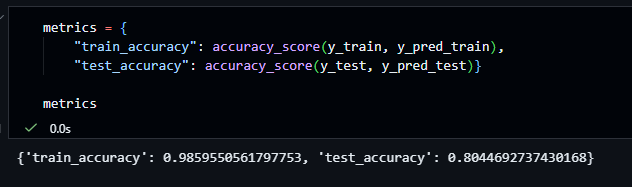

BernoulliNB:

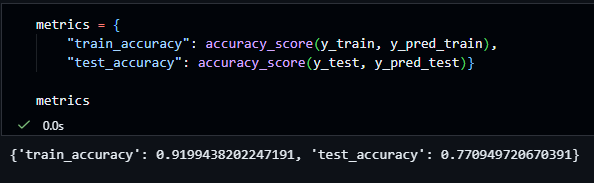

MultinomialNB:

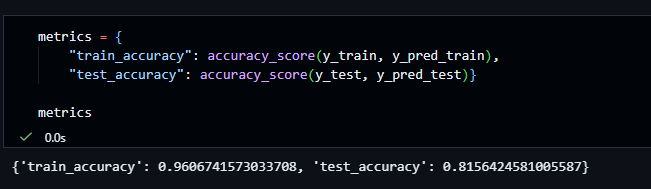

## Paso 4: Newsgroups

In [12]:
data = fetch_20newsgroups(subset='all')

In [13]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [14]:
len(data.target_names), len(data.data)

(20, 18846)

In [15]:
# Split
train_data = fetch_20newsgroups(subset="train")
test_data = fetch_20newsgroups(subset="test")

In [16]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(train_data.data)
X_test_tfidf = vectorizer.transform(test_data.data)

In [17]:
# Entrenamiento del clasificador
model = MultinomialNB()
model.fit(X_train_tfidf, train_data.target)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [18]:
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)

In [19]:
# Métricas
metrics = {"Accuracy Train: ": accuracy_score(train_data.target, y_pred_train),
           "Accuracy Test ": accuracy_score(test_data.target, y_pred_test)}

metrics

{'Accuracy Train: ': 0.9326498143892522, 'Accuracy Test ': 0.7738980350504514}

### Comparacion de modelos:


BernoulliNB:

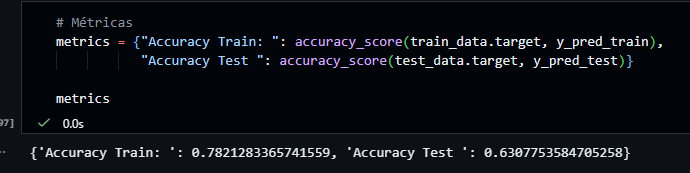

MultinomialNB:

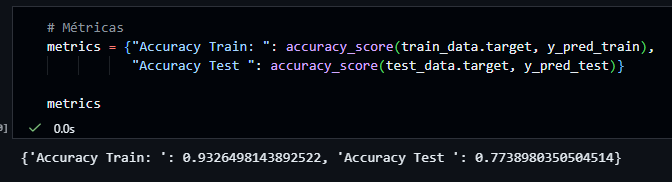

## Hiperparametrizacion

In [20]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB())
])

In [21]:
hyperparams = {"tfidf__max_df": [0.5, 0.75, 1.0],
               "tfidf__ngram_range": [(1,1), (1,2)],
               "model__alpha": np.linspace(0.01, 10.0, 200),
               "model__fit_prior": [True, False]}


random_search = RandomizedSearchCV(pipeline,
                                  hyperparams,
                                  n_iter=50,
                                  scoring="accuracy",
                                  cv=5,
                                  random_state=18)

random_search

,estimator,Pipeline(step...inomialNB())])
,param_distributions,"{'model__alpha': array([ 0.01 ... 10. ]), 'model__fit_prior': [True, False], 'tfidf__max_df': [0.5, 0.75, ...], 'tfidf__ngram_range': [(1, ...), (1, ...)]}"
,n_iter,50
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,18
,error_score,nan


In [22]:
random_search.fit(X_train, y_train)

random_search.best_params_

{'tfidf__ngram_range': (1, 1),
 'tfidf__max_df': 0.5,
 'model__fit_prior': False,
 'model__alpha': np.float64(0.11040201005025126)}

In [23]:
best_model = random_search.best_estimator_
best_model

,steps,"[('tfidf', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [24]:
best_y_pred_test = best_model.predict(X_test)
best_y_pred_train = best_model.predict(X_train)

In [25]:
# Métricas
metrics = {"Accuracy Train: ": accuracy_score(best_y_pred_train, y_train),
           "Accuracy Test ": accuracy_score(best_y_pred_test, y_test)}

metrics

{'Accuracy Train: ': 0.9859550561797753, 'Accuracy Test ': 0.8324022346368715}

## WordsCloud

In [26]:
dirname = path.dirname("/workspaces/machine-learning-elius123ef/data/raw/playstore_reviews.csv")
text = open(path.join(dirname, 'playstore_reviews.csv')).read()

In [27]:
wordcloud = WordCloud().generate(text)

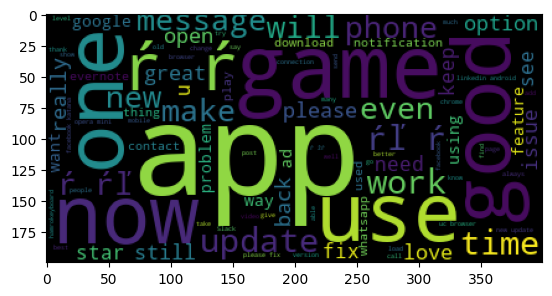

In [28]:
plt.imshow(wordcloud)